--------------------------------
mode: two-sided
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14
--------------------------------
mode: greater
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14
--------------------------------
mode: less
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14


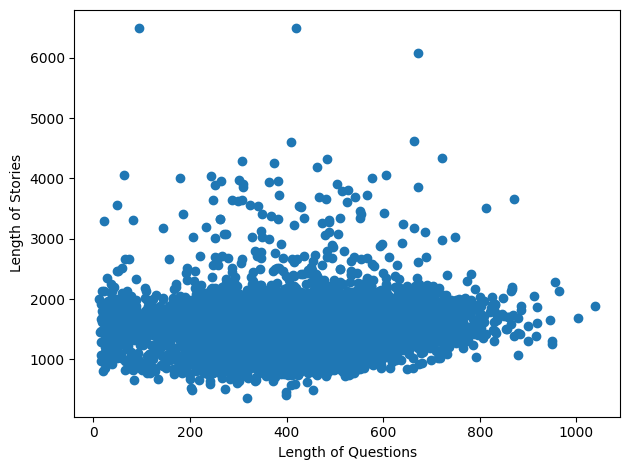

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data_path = '../data/coqa_train.csv'
coqa_data = pd.read_csv(data_path)

question_lengths = []
story_lengths = []

for idx, row in coqa_data.iterrows():
    questions = eval(row['questions'])
    story = row['story']
    
    story_length = len(story)  
    for question in questions:
        question_length = len(question)  
        question_lengths.append(question_length)
        story_lengths.append(story_length)


question_lengths = np.array(question_lengths)
story_lengths = np.array(story_lengths)


for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    corr, p = scipy.stats.pearsonr(question_lengths, story_lengths)
    print(f"Pearson: {corr:+.4e}; p-value: {p:+.4e}")
    corr, p = scipy.stats.spearmanr(question_lengths, story_lengths)
    print(f"Spearman: {corr:+.4e}; p-value: {p:+.4e}")


plt.scatter(question_lengths, story_lengths)
plt.xlabel("Length of Questions")
plt.ylabel("Length of Stories")
plt.tight_layout()
plt.show()
